In [2]:
import cv2
import matplotlib.pyplot as plt
import easyocr

reader = easyocr.Reader(['hi', 'mr'])
reader.readtext('input.png')

[([[np.int32(400), np.int32(42)],
   [np.int32(550), np.int32(42)],
   [np.int32(550), np.int32(122)],
   [np.int32(400), np.int32(122)]],
  'चुबक',
  np.float64(0.560803223389556)),
 ([[np.int32(1083), np.int32(671)],
   [np.int32(1263), np.int32(671)],
   [np.int32(1263), np.int32(715)],
   [np.int32(1083), np.int32(715)]],
  '$<',
  np.float64(0.04775641036448522))]

In [9]:
img = cv2.imread('input.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
norm_img = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
_, thresh = cv2.threshold(norm_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
denoised = cv2.medianBlur(thresh, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
img_dilated = cv2.dilate(denoised, kernel, iterations=1)


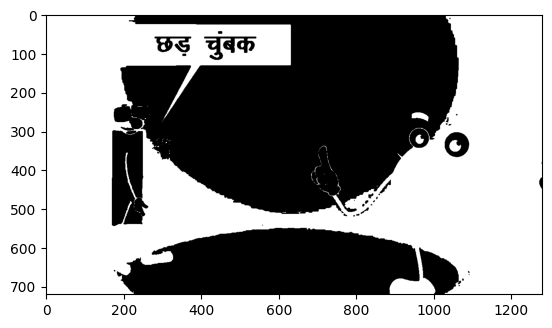

In [10]:
plt.imshow(img_dilated, cmap='binary')

In [11]:
cv2.imwrite('output.png', img_dilated)

True

In [50]:
results

[[[[350, 60], [380, 60], [380, 100], [350, 100]], '5'],
 [[[392, 32], [556, 32], [556, 132], [392, 132]], 'चुंबक'],
 [[[1267, 361], [1279, 361], [1279, 443], [1267, 443]], ''],
 [[[1080, 666], [1268, 666], [1268, 720], [1080, 720]], '$द<']]

In [51]:
import cv2
import numpy as np

# Load image
img = cv2.imread('input.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert colors (optional)
inv = cv2.bitwise_not(gray)

# Contrast enhancement using CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl1 = clahe.apply(inv)

# Binarization using adaptive thresholding
thresh = cv2.adaptiveThreshold(cl1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)

# Dilate to thicken text
kernel = np.ones((2,2), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=1)

# Resize image for better OCR accuracy
resized = cv2.resize(dilated, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

cv2.imwrite('preprocessed.jpg', resized)


True

In [58]:
import cv2
import numpy as np

# Load image
img = cv2.imread('input.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert colors (since text is bright)
inv = cv2.bitwise_not(gray)

# CLAHE for contrast enhancement
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl1 = clahe.apply(inv)

# Sharpening kernel
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharp = cv2.filter2D(cl1, -1, kernel_sharpening)

# Morphological closing (dilation + erosion) with small kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
closing = cv2.morphologyEx(sharp, cv2.MORPH_CLOSE, kernel)

# Resize image (3x for better OCR detail)
resized = cv2.resize(closing, None, fx=3, fy=3, interpolation=cv2.INTER_LINEAR)

cv2.imwrite('preprocessed_enhanced.jpg', resized)


True

In [59]:
import easyocr

reader = easyocr.Reader(['hi'], gpu=True)
image = 'preprocessed_enhanced.jpg'
results = reader.readtext(image,
                          contrast_ths=0.4,
                          adjust_contrast=0.8,
                          text_threshold=0.35,
                          low_text=0.25,
                          decoder='wordbeamsearch',
                          paragraph=True)

In [60]:
results

[[[[798, 102], [1665, 102], [1665, 396], [798, 396]], 'छड चुंबक'],
 [[[2373, 665], [3840, 665], [3840, 1571], [2373, 1571]], '६6  =/ &'],
 [[[433, 1671], [1015, 1671], [1015, 2071], [433, 2071]], '९५'],
 [[[3232, 1999], [3805, 1999], [3805, 2159], [3232, 2159]], '९&']]

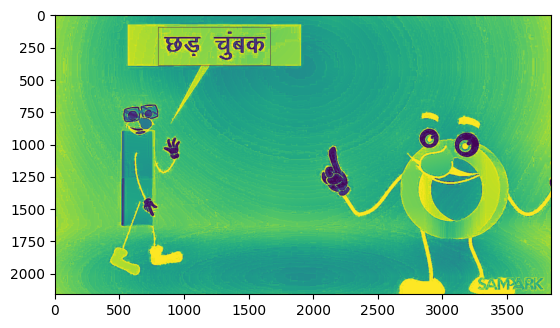

In [67]:
import cv2
import numpy as np

img = resized

plt.imshow(cv2.rectangle(img, (798, 102),(1665,396), (0,255,0), 2))
